## Veränderungen der Müttersterblichkeitsrate zwischen 1990 und 2020

Gruppe: Veronika Miteva, Cristiana Pereira Bastos

Fragen

- Welche Länder verzeichneten zwischen 1990 und 2020 die grösste Zunahme bzw. Abnahme der Müttersterblichkeitsrate?
- Welche Ursachen haben diese Veränderungen bewirkt?

Quellen

- https://ourworldindata.org/grapher/maternal-mortality?tab=chart



## 1. Daten beschaffen und laden

In [128]:
import pandas as pd
from matplotlib import pyplot as plt

In [129]:
# loading the data
df = pd.read_csv('maternal-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Müttersterblichkeitsrate']) 
df.head()  

,Gebiet,Code,Jahr,Müttersterblichkeitsrate
0,Afghanistan,AFG,1990,1377.8586
1,Afghanistan,AFG,1991,1392.7859
2,Afghanistan,AFG,1992,1451.5940
3,Afghanistan,AFG,1993,1368.8162
4,Afghanistan,AFG,1994,1375.0907


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [130]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Müttersterblichkeitsrate')
df_pivot.head(10)

Jahr,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1377.858600,1392.785900,1451.594000,1368.816200,1375.090700,1400.843100,1375.512100,1365.285400,1459.281700,1359.217000,...,883.713900,833.477200,820.685360,785.354060,775.692700,749.815700,681.807560,663.427500,644.272600,620.407530
Africa,850.230470,841.734440,866.155600,856.238300,823.597660,801.836240,797.670800,782.369260,804.273740,739.202330,...,559.112730,544.019350,535.414900,527.162960,511.222660,504.341700,496.157680,487.919560,478.501220,464.001100
Albania,32.874947,29.074210,27.674513,26.515451,24.240550,22.034124,18.685230,18.388054,15.522337,14.890729,...,8.045227,7.796703,7.215363,7.009861,6.878285,6.656085,6.689698,5.429293,5.305023,8.276446
Algeria,205.819780,203.991150,203.641430,203.941440,202.641190,203.828450,192.425870,180.901370,186.704060,186.782930,...,105.463295,99.075800,94.344080,86.151470,89.132650,88.997700,89.143540,79.491210,76.714340,77.694786
Angola,1101.505700,1057.425800,1144.283900,1096.306500,1062.217900,1022.624200,997.420500,961.121640,934.120200,893.486900,...,334.731300,304.040400,291.413970,291.747340,273.596530,269.823580,252.804860,233.096250,227.686970,221.906510
Argentina,87.814260,82.481020,81.170950,78.660240,77.387950,76.439950,69.662770,70.722530,69.755104,70.112686,...,50.251950,45.024837,43.346664,41.764570,39.335068,40.259438,38.243805,33.944830,32.602604,44.900078
Australia,8.255920,8.785240,8.792665,8.958936,9.348918,8.086464,7.786785,7.883337,7.467751,7.176690,...,5.937448,5.859328,5.993525,5.390199,5.244025,5.175834,4.771443,4.424252,5.085507,2.941509
Azerbaijan,47.490790,49.915430,51.201244,57.301630,59.103413,58.415882,65.263670,61.925827,63.672516,55.722027,...,30.739494,29.373413,28.398930,28.972912,29.377861,26.018137,26.893013,27.599777,26.869574,40.763668
Bahamas,53.264645,54.550106,56.040950,57.743706,53.773705,56.056854,59.031590,59.091793,54.490010,66.813896,...,100.577354,101.345790,82.225075,96.984470,84.445320,79.304985,77.332810,77.080315,82.026985,77.050640


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

Die Analyse der einzelnen Spalten ergibt folgende Erkenntnisse:  
- Die Spalte *Gebiete* umfasst 110 unterschiedliche Regionen.  
- Die Spalte *Codes* umfasst 110 unterschiedliche Codes.
- Die Daten erstrecken sich über den Zeitraum von 1990 bis 2020. Die Analyse der Jahre wird in zwei separaten Diagrammen präsentiert. 
- Der Mittelwert der Müttersterblichkeitsrate beträgt 219,03 Todesfälle pro 100.000 Lebendgeburten, während der Median bei 57,97 liegt. Die Werte streuen von einem Minimum von 1,66 bis zu einem Maximum von 1792,35, was auf grosse Unterschiede zwischen verschiedenen Regionen oder Zeiträumen hinweist.


In [131]:
df.dtypes

Gebiet                       object
Code                         object
Jahr                          int64
Müttersterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [132]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  110


In [133]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Afghanistan     31
Portugal        31
Slovenia        31
Slovakia        31
Sierra Leone    31
                ..
Estonia         31
Eritrea         31
Zimbabwe        31
Dominica        10
Mayotte          5
Name: count, Length: 110, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

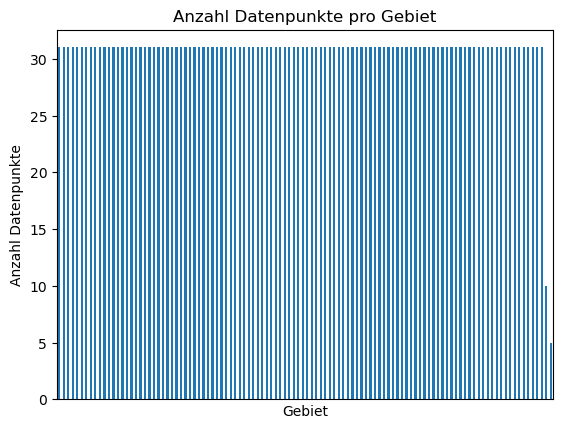

In [134]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [135]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  110


In [136]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
AFG    31
PRI    31
SLB    31
SVN    31
SVK    31
       ..
FIN    31
ETH    31
ZWE    31
DMA    10
MYT     5
Name: count, Length: 109, dtype: int64

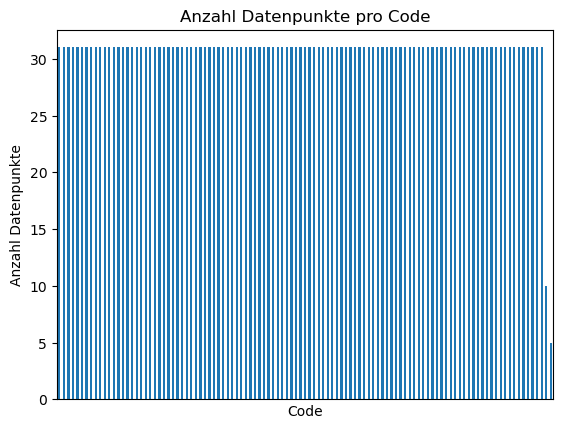

In [137]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr 

In [138]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  31


In [139]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1990    108
1991    109
1992    109
1993    108
1994    109
1995    109
1996    108
1997    108
1998    109
1999    108
2000    108
2001    109
2002    109
2003    108
2004    108
2005    108
2006    108
2007    108
2008    109
2009    108
2010    109
2011    108
2012    109
2013    109
2014    109
2015    109
2016    110
2017    108
2018    108
2019    108
2020    108
Name: count, dtype: int64

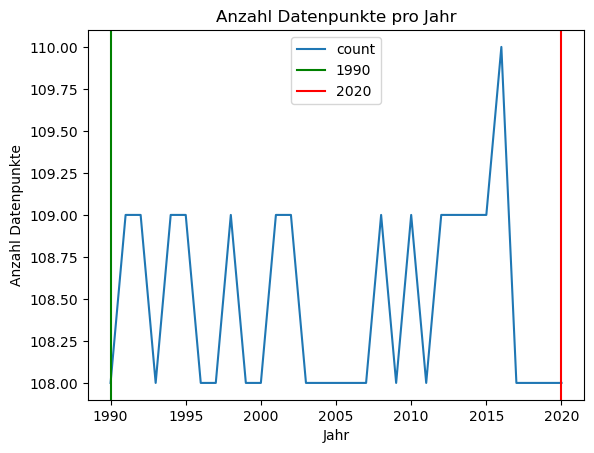

In [140]:
# Jahre mit maximaler Anzahl Datenpunkte (109)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr')
g.axvline(x=1990, color='green',label='1990') # grüne Linie bei 1990 - ab diesem Jahr beginnen die Daten
g.axvline(x=2020, color='red',label='2020') # rote Linie bei 2020 - bis zu diesem Jahr reichen die Daten

g.legend()  # Legende anzeigen

### 3.4 Analyse Müttersterblichkeitsrate

In [141]:
df.describe()

,Jahr,Müttersterblichkeitsrate
count,3363.000000,3363.000000
mean,2005.000595,219.037908
std,8.946101,323.266648
min,1990.000000,1.663741
25%,1997.000000,16.238228
50%,2005.000000,57.969803
75%,2013.000000,323.010770
max,2020.000000,1792.346700


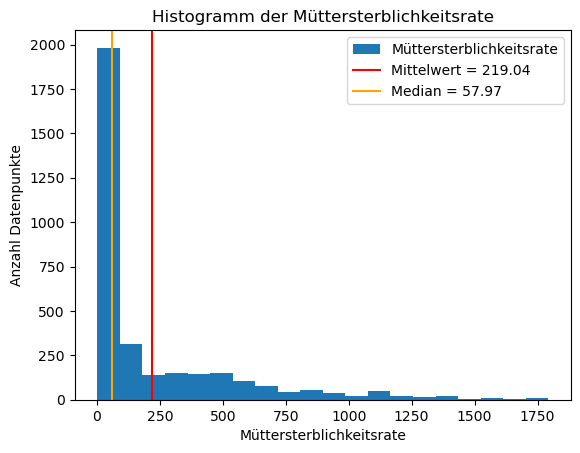

In [142]:
g = df['Müttersterblichkeitsrate'].plot(kind='hist', bins=20, title='Histogramm der Müttersterblichkeitsrate', 
                           xlabel='Müttersterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Müttersterblichkeitsrate'].mean()
g.axvline(x=df['Müttersterblichkeitsrate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Müttersterblichkeitsrate'].median()
g.axvline(x=df['Müttersterblichkeitsrate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

## 4. Analyse

### Vorgehen

### Beobachtungen

Die Länder mit der grössten Abnahme der Müttersterblichkeitsrate zwischen 1990 und 2020 sind:
- Sierra Leone: Abnahme um 1.096 Todesfälle pro 100.000 Lebendgeburten.
- Burundi: Abnahme um 1.010 Todesfälle pro 100.000 Lebendgeburten.
- Eritrea: Abnahme um 997 Todesfälle pro 100.000 Lebendgeburten.
- Ethiopia: Abnahme um 969 Todesfälle pro 100.000 Lebendgeburten.
- Equatorial Guinea: Abnahme um 966 Todesfälle pro 100.000 Lebendgeburten.

Die Länder mit der grössten Zunahme der Müttersterblichkeitsrate zwischen 1990 und 2020 sind:
- Venezuela: Zunahme um 158 Todesfälle pro 100.000 Lebendgeburten.
- Bahamas: Zunahme um 24 Todesfälle pro 100.000 Lebendgeburten.
- Zimbabwe: Zunahme um 19 Todesfälle pro 100.000 Lebendgeburten.
- Vereinigte Staaten: Zunahme um 11 Todesfälle pro 100.000 Lebendgeburten.
- Tonga: Zunahme um 9 Todesfälle pro 100.000 Lebendgeburten.


### Interpretation

Die Ursachen für die Veränderungen der Müttersterblichkeitsrate zwischen 1990 und 2020 lassen sich in verschiedene Kategorien einteilen:

1. Gründe für die Abnahme der Müttersterblichkeitsrate:
- Verbesserte Gesundheitsversorgung: In Ländern wie Sierra Leone und Äthiopien haben umfangreiche internationale Programme, wie die von der Weltgesundheitsorganisation (WHO) unterstützte „Global Strategy for Women’s, Children’s and Adolescents’ Health“, den Zugang zu pränataler und geburtshilflicher Betreuung deutlich verbessert. Diese Initiativen zielen darauf ab, die Gesundheitsinfrastruktur durch Investitionen in medizinisches Personal und den Ausbau ländlicher Gesundheitsdienste zu stärken.
- Aufklärung und Bildung: Länder wie Burundi und Eritrea haben durch gezielte Bildungsprogramme, wie sie von UNICEF unterstützt werden, Frauen dazu befähigt, sich besser um ihre Schwangerschaften zu kümmern. Diese Programme beinhalten Schulungen zur Erkennung von Risiken in der Schwangerschaft und zur Nutzung verfügbarer Gesundheitsdienste.
- Globale Entwicklungsprogramme: Die Initiative „Every Woman Every Child“ der Vereinten Nationen hat finanzielle Unterstützung für medizinische Einrichtungen und Medikamente bereitgestellt. Dies hat zu einer spürbaren Reduktion der Müttersterblichkeitsrate in vielen afrikanischen Ländern geführt. 

2. Gründe für die Zunahme der Müttersterblichkeitsrate:
- Wirtschaftliche Instabilität und Zusammenbruch von Gesundheitssystemen: Länder wie Venezuela haben durch lang anhaltende Wirtschaftskrisen massive Einschränkungen im Gesundheitswesen erfahren. Der Mangel an Medikamenten, qualifiziertem Personal und finanziellen Mitteln hat die Betreuung schwangerer Frauen stark beeinträchtigt.
- Einschränkungen im Zugang zur Gesundheitsversorgung: In Ländern wie den Bahamas und Zimbabwe haben politische Instabilität und wirtschaftliche Unsicherheiten die Verfügbarkeit von medizinischen Fachkräften und Ressourcen eingeschränkt. Vor allem in ländlichen Gebieten mangelt es an qualifizierter Geburtshilfe und Notfallversorgung.
- Soziale und wirtschaftliche Ungleichheiten: In den Vereinigten Staaten wird die steigende Müttersterblichkeitsrate auf systemische Ungleichheiten im Gesundheitssystem zurückgeführt. Vor allem Frauen in benachteiligten Bevölkerungsgruppen erhalten oft keine ausreichende pränatale Versorgung. Gleichzeitig tragen chronische Krankheiten wie Adipositas und Diabetes zu einem erhöhten Risiko bei.


##### Quellen:
- WHO-Bericht 2021: https://www.who.int/reports
- UNICEF-Bericht 2020: https://www.unicef.org
- Every Woman Every Child, UN 2020: https://www.everywomaneverychild.org
- UNO-Flüchtlingshilfe, Venezuela 2023: https://www.uno-fluechtlingshilfe.de/venezuela
- The Lancet 2021: https://www.thelancet.com
- CDC-Bericht 2022: https://www.cdc.gov



### Berechnungen

In [143]:
diffs = df_pivot[2020]-df_pivot[1990]   # Differenz zwischen 1990 und 2020
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz
diffs

Gebiet
Sierra Leone        -1096.053600
Burundi             -1010.934000
Eritrea              -997.374580
Ethiopia             -969.624060
Equatorial Guinea    -966.497300
                        ...     
Tonga                   9.011800
United States          11.045043
Zimbabwe               19.208800
Bahamas                23.785995
Venezuela             158.487390
Length: 108, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Müttersterblichkeitsrate 1990–2020'}, ylabel='Gebiet'>

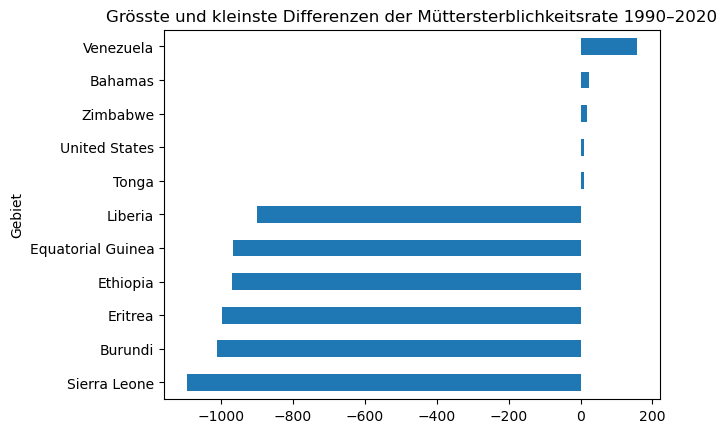

In [144]:
diff_sel = (diffs < -900) | (diffs > 8)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Müttersterblichkeitsrate 1990–2020')

In [145]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Sierra Leone', 'Burundi', 'Eritrea', 'Ethiopia', 'Equatorial Guinea', 'Liberia', 'Tonga', 'United States', 'Zimbabwe', 'Bahamas', 'Venezuela']


### Visualisierung

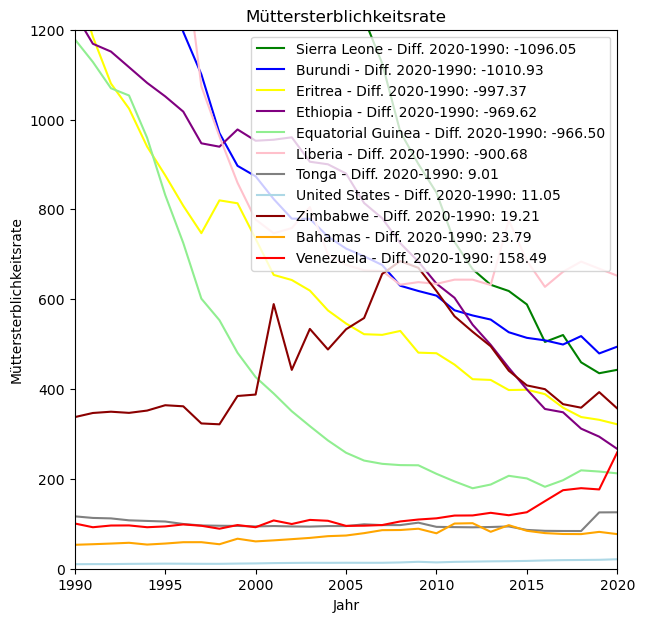

In [146]:
color_dict = {
    'Sierra Leone': 'green',
    'Burundi': 'blue',
    'Eritrea': 'yellow',
    'Ethiopia': 'purple',
    'Equatorial Guinea': 'lightgreen',
    'Liberia': 'pink',
    'Tonga': 'gray',
    'United States': 'lightblue',
    'Zimbabwe': 'darkred',
    'Bahamas': 'orange',
    'Venezuela': 'red'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Müttersterblichkeitsrate', xlabel='Jahr', ylabel=f'Müttersterblichkeitsrate', legend=True,
                                  label=f'{gebiet} - Diff. 2020-1990: {diff:.2f}', # für die Legende
                                  xlim=[1990,2020], ylim=[0,1200],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],          # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots
